In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# reading menu.csv
menu_df = pd.read_csv("menu.csv")

menu_df.head()


,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [2]:
# Finding max of each column
print("Max of each column is: ")
menu_df[['Calories', 'Total Fat', 'Carbohydrates', 'Dietary Fiber', 'Sugars' , 'Protein', 'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)', 'Calcium (% Daily Value)', 'Iron (% Daily Value)']].max()

Max of each column is: 


Calories                     1880.0
Total Fat                     118.0
Carbohydrates                 141.0
Dietary Fiber                   7.0
Sugars                        128.0
Protein                        87.0
Vitamin A (% Daily Value)     170.0
Vitamin C (% Daily Value)     240.0
Calcium (% Daily Value)        70.0
Iron (% Daily Value)           40.0
dtype: float64

/var/folders/9s/3d7b5lt55zggdrplnwwbsq_40000gp/T/ipykernel_25743/188637424.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = menu_df.corr()


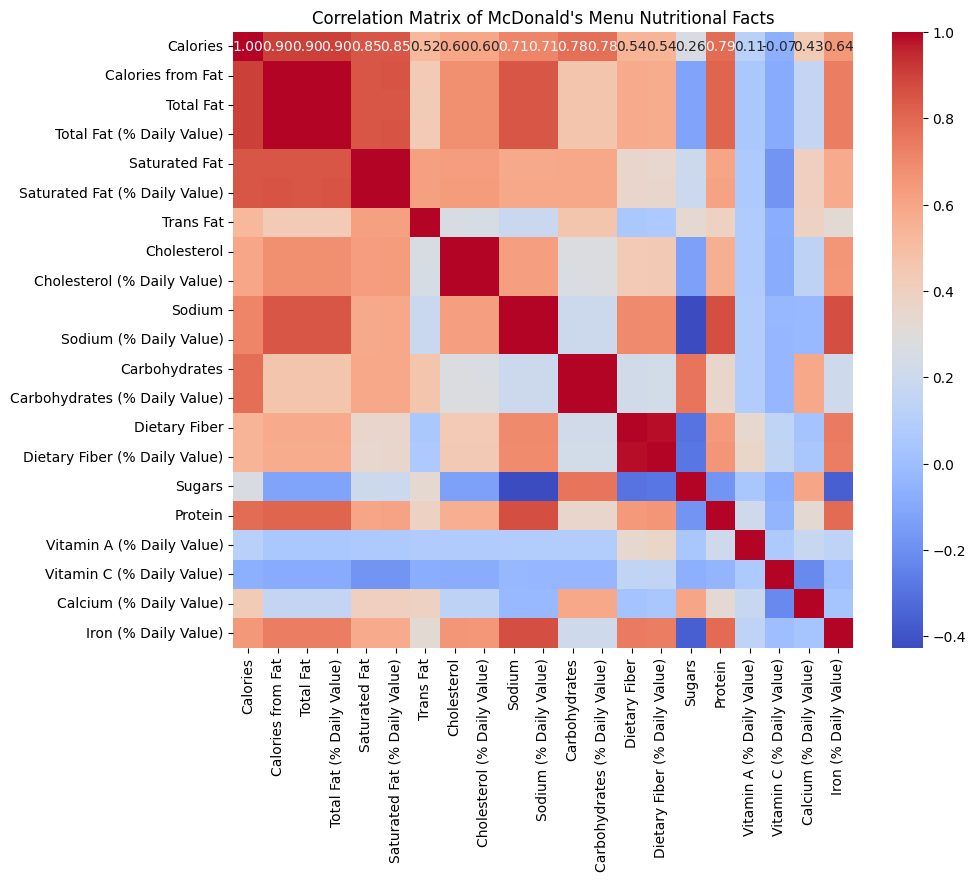

In [3]:
# Calculating the correlation matrix
correlation_matrix = menu_df.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of McDonald\'s Menu Nutritional Facts')
plt.show()

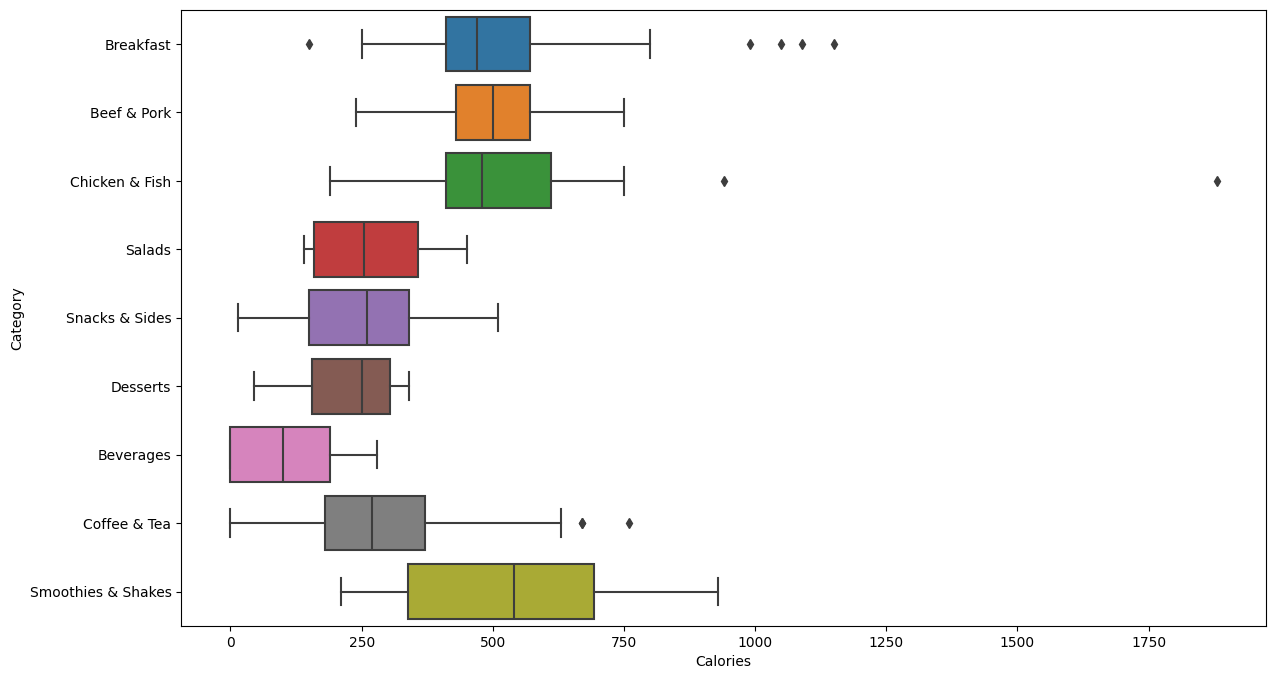

In [4]:
plt.figure(figsize=(14, 8))
categories_vs_calorie_boxplot = sns.boxplot(x = menu_df['Calories'], y = menu_df['Category'])

plt.show()


In [5]:
attributes = [
    'Calories', 'Total Fat', 'Carbohydrates', 'Dietary Fiber',
    'Sugars', 'Protein', 'Vitamin A (% Daily Value)',
    'Vitamin C (% Daily Value)', 'Calcium (% Daily Value)',
    'Iron (% Daily Value)'
]

# Initializing an empty dictionary to store the item with the highest amount for each attribute
max_items = {}

# Iterating over each attribute to find the item with the highest amount
for attribute in attributes:
    max_row = menu_df.loc[menu_df[attribute].idxmax()]
    max_items[attribute] = max_row

for attribute, row in max_items.items():
    print(f"{attribute}: {row['Item']} - {row[attribute]:.1f}")

Calories: Chicken McNuggets (40 piece) - 1880.0
Total Fat: Chicken McNuggets (40 piece) - 118.0
Carbohydrates: Chocolate Shake (Large) - 141.0
Dietary Fiber: Big Breakfast with Hotcakes (Large Biscuit) - 7.0
Sugars: McFlurry with M&M’s Candies (Medium) - 128.0
Protein: Chicken McNuggets (40 piece) - 87.0
Vitamin A (% Daily Value): Premium Bacon Ranch Salad (without Chicken) - 170.0
Vitamin C (% Daily Value): Minute Maid Orange Juice (Large) - 240.0
Calcium (% Daily Value): Strawberry Shake (Large) - 70.0
Iron (% Daily Value): Big Breakfast with Hotcakes (Regular Biscuit) - 40.0


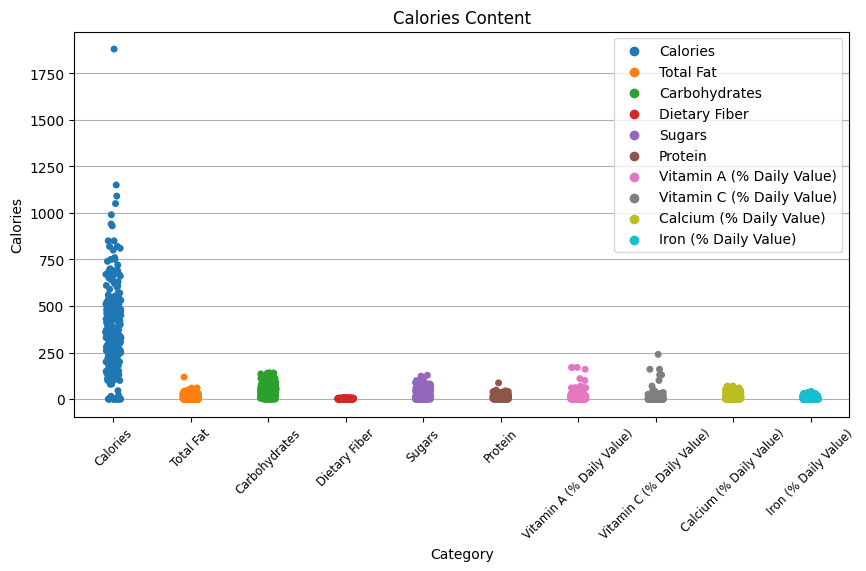

In [6]:
columns = ['Calories', 'Total Fat', 'Carbohydrates', 'Dietary Fiber', 'Sugars', 'Protein', 'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)', 'Calcium (% Daily Value)', 'Iron (% Daily Value)']

plt.figure(figsize=(10, 5))
plt.title("Calories Content")
plt.xticks(rotation=45)
plt.grid(True)
plt.xticks(fontsize='small')
plt.xlabel("Category")
plt.ylabel("Calories")

sns.stripplot(data = menu_df[columns], legend=True)

plt.show()

In [7]:
# Listing all categories
categories = menu_df['Category'].unique()
print(categories)

['Breakfast' 'Beef & Pork' 'Chicken & Fish' 'Salads' 'Snacks & Sides'
 'Desserts' 'Beverages' 'Coffee & Tea' 'Smoothies & Shakes']


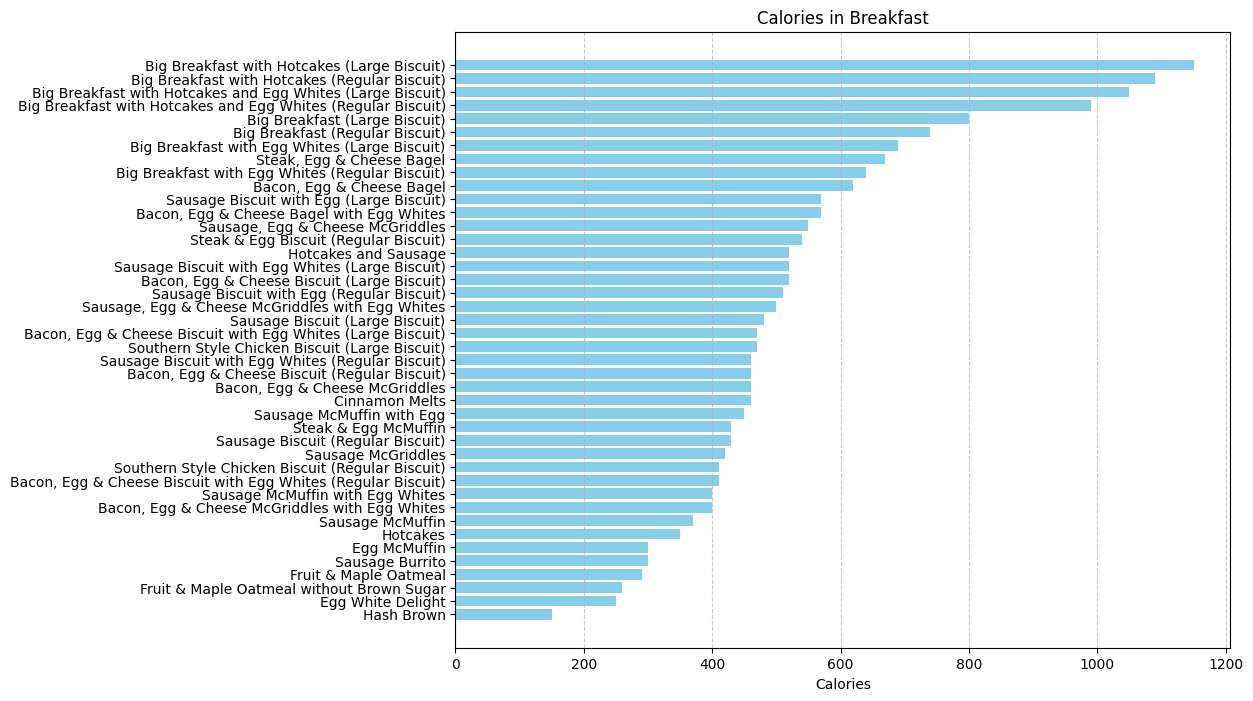

In [8]:
# Breakfast
# Filter the data for the "Breakfast" category
breakfast_data = menu_df[menu_df['Category'] == 'Breakfast']

# Sort the items based on calories in ascending order
breakfast_data_sorted = breakfast_data.sort_values('Calories')

# Plot
plt.figure(figsize=(10, 8))
plt.barh(breakfast_data_sorted['Item'], breakfast_data_sorted['Calories'], color='skyblue')
plt.xlabel('Calories')
plt.title('Calories in Breakfast')
plt.grid(axis='x', linestyle='--', alpha=0.7)

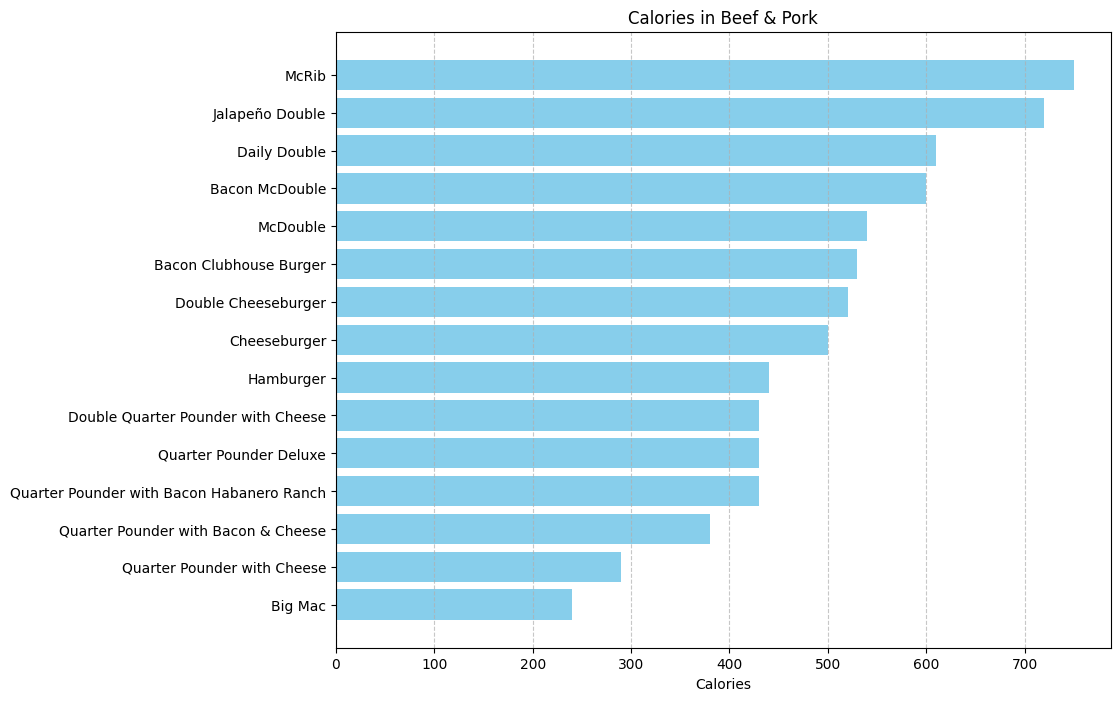

In [9]:
# Beef & Pork
# Filtering the data for the "Beef & Pork" category
beef_and_pork_data = menu_df[menu_df['Category'] == 'Beef & Pork']

# Sorting the items based on calories
beef_and_pork_data_sorted = beef_and_pork_data.sort_values('Calories')

# Plotting
plt.figure(figsize=(10, 8))
plt.barh(beef_and_pork_data['Item'], beef_and_pork_data_sorted['Calories'], color='skyblue')
plt.xlabel('Calories')
plt.title('Calories in Beef & Pork')
plt.grid(axis='x', linestyle='--', alpha=0.7)

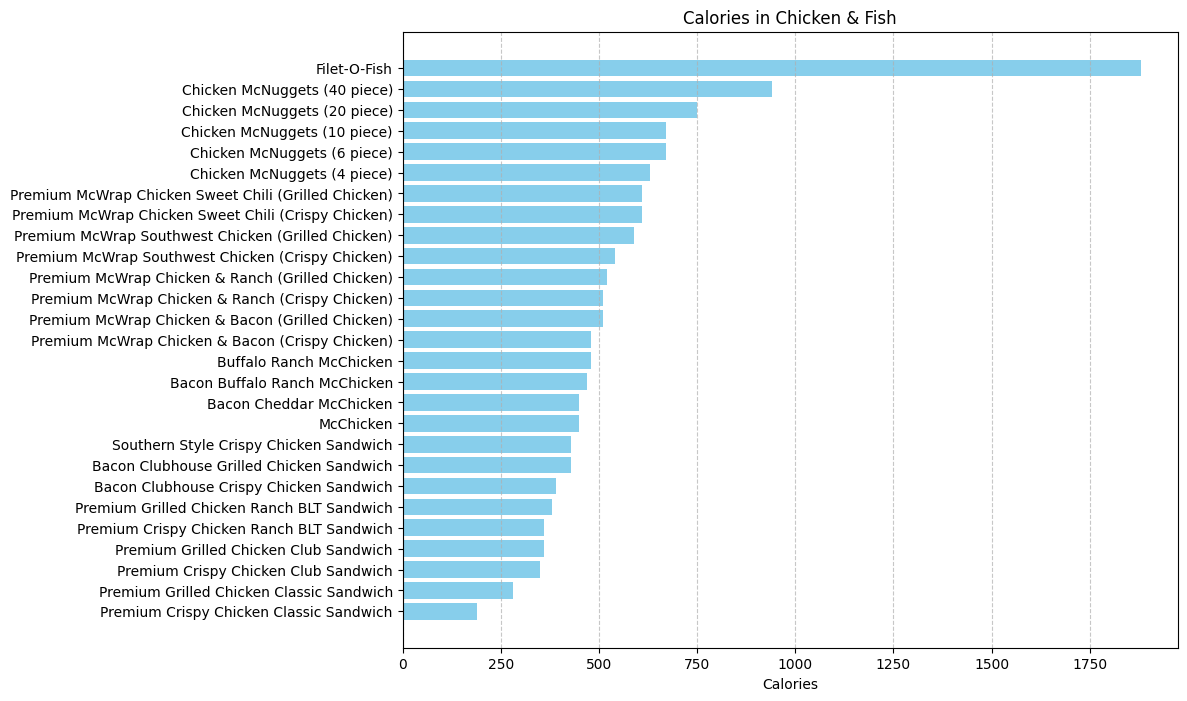

In [10]:
# Chicken & Fish
# Filtering the data for the "Chicken & Fish" category
chicken_and_fish_data = menu_df[menu_df['Category'] == 'Chicken & Fish']

# Sorting the items based on calories in ascending order
chicken_and_fish_data_sorted = chicken_and_fish_data.sort_values('Calories')

# Plotting
plt.figure(figsize=(10, 8))
plt.barh(chicken_and_fish_data['Item'], chicken_and_fish_data_sorted['Calories'], color='skyblue')
plt.xlabel('Calories')
plt.title('Calories in Chicken & Fish')
plt.grid(axis='x', linestyle='--', alpha=0.7)

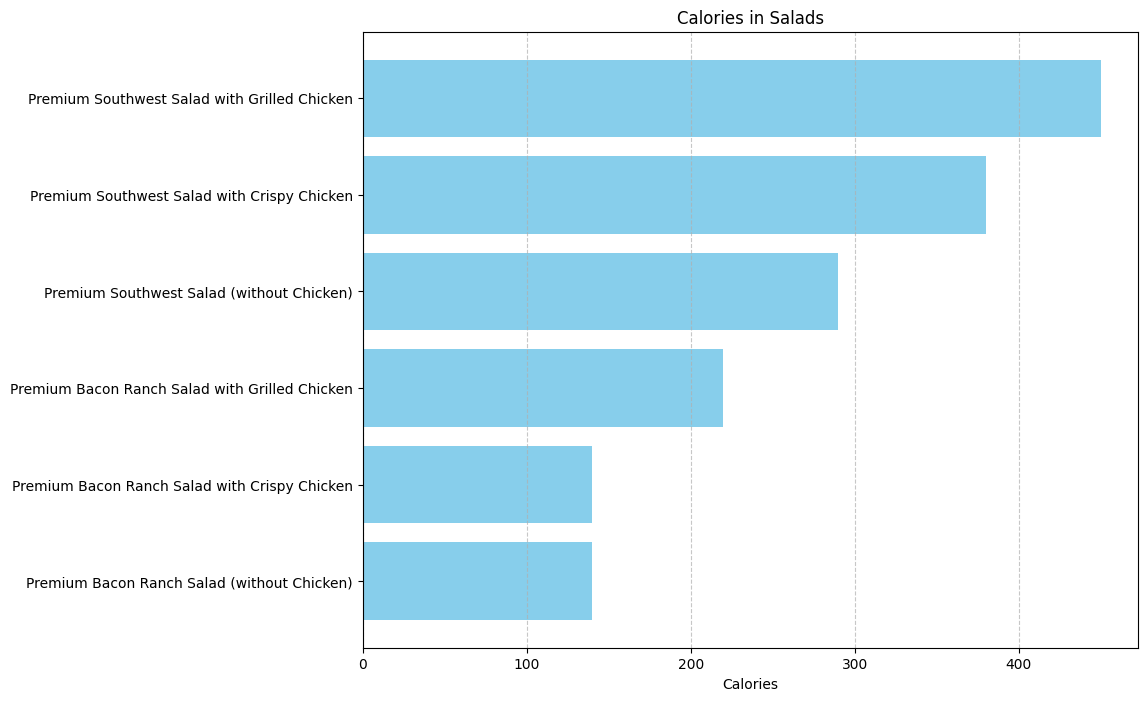

In [11]:
# Salads
# Filtering the data for the "Salads" category
salads_data = menu_df[menu_df['Category'] == 'Salads']

# Sorting the items based on calories in ascending order
salads_data_sorted = salads_data.sort_values('Calories')

# Plotting
plt.figure(figsize=(10, 8))
plt.barh(salads_data['Item'], salads_data_sorted['Calories'], color='skyblue')
plt.xlabel('Calories')
plt.title('Calories in Salads')
plt.grid(axis='x', linestyle='--', alpha=0.7)

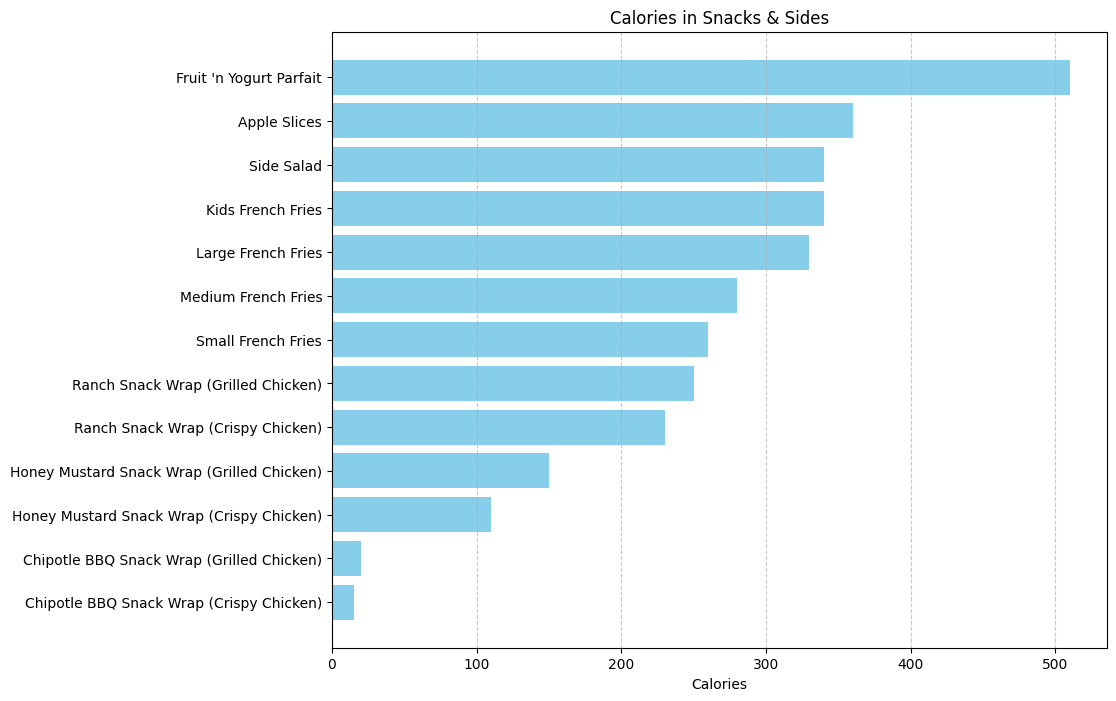

In [12]:
# Snacks & Sides
# Filtering the data for the "Snacks & Sides" category
snacks_and_sides_data = menu_df[menu_df['Category'] == 'Snacks & Sides']

# Sorting the items based on calories in ascending order
snacks_and_sides_data_sorted = snacks_and_sides_data.sort_values('Calories')

# Plotting
plt.figure(figsize=(10, 8))
plt.barh(snacks_and_sides_data['Item'], snacks_and_sides_data_sorted['Calories'], color='skyblue')
plt.xlabel('Calories')
plt.title('Calories in Snacks & Sides')
plt.grid(axis='x', linestyle='--', alpha=0.7)

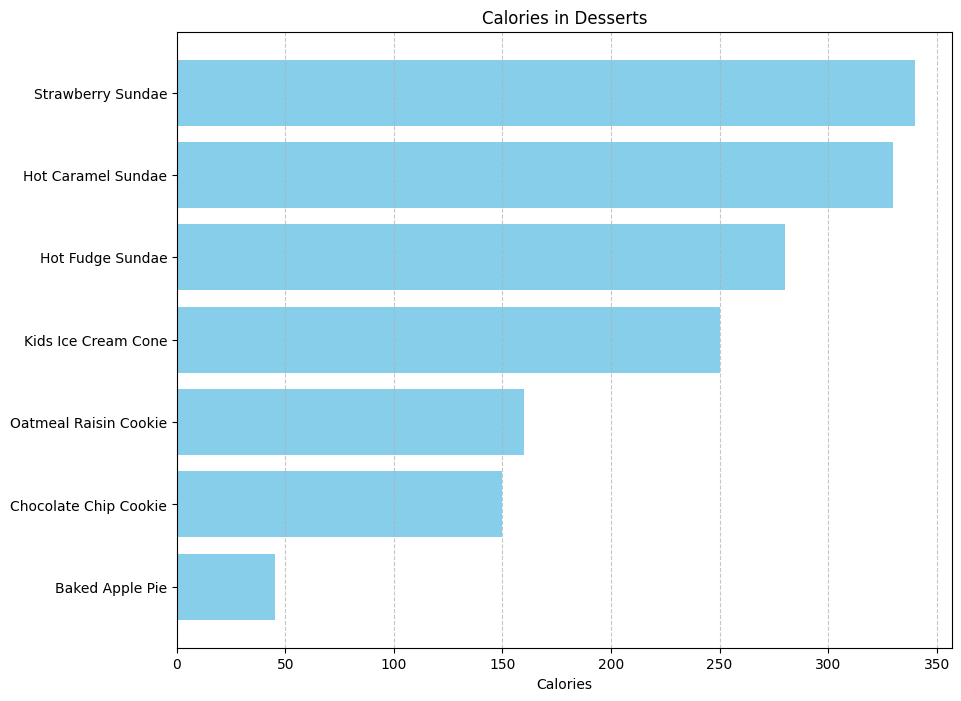

In [13]:
# Desserts
# Filtering the data for the "Desserts" category
desserts_data = menu_df[menu_df['Category'] == 'Desserts']

# Sorting the items based on calories in ascending order
desserts_data_sorted = desserts_data.sort_values('Calories')

# Plotting
plt.figure(figsize=(10, 8))
plt.barh(desserts_data['Item'], desserts_data_sorted['Calories'], color='skyblue')
plt.xlabel('Calories')
plt.title('Calories in Desserts')
plt.grid(axis='x', linestyle='--', alpha=0.7)

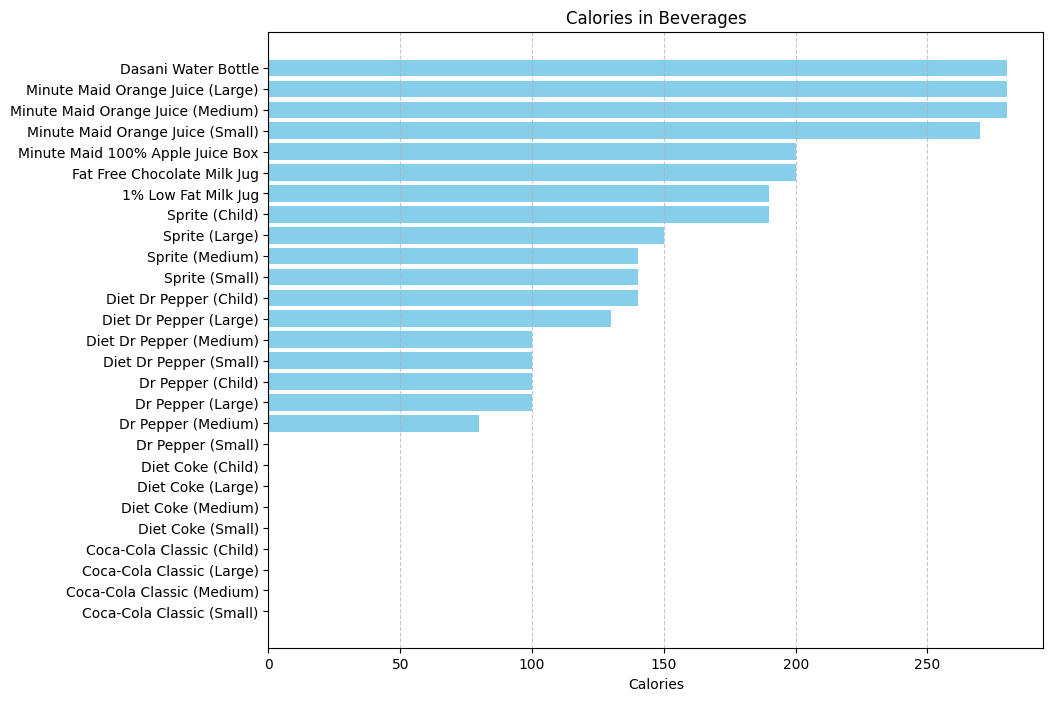

In [14]:
# Beverages
# Filtering the data for the "Beverages" category
beverages_data = menu_df[menu_df['Category'] == 'Beverages']

# Sorting the items based on calories in ascending order
beverages_data_sorted = beverages_data.sort_values('Calories')

# Plotting
plt.figure(figsize=(10, 8))
plt.barh(beverages_data['Item'], beverages_data_sorted['Calories'], color='skyblue')
plt.xlabel('Calories')
plt.title('Calories in Beverages')
plt.grid(axis='x', linestyle='--', alpha=0.7)

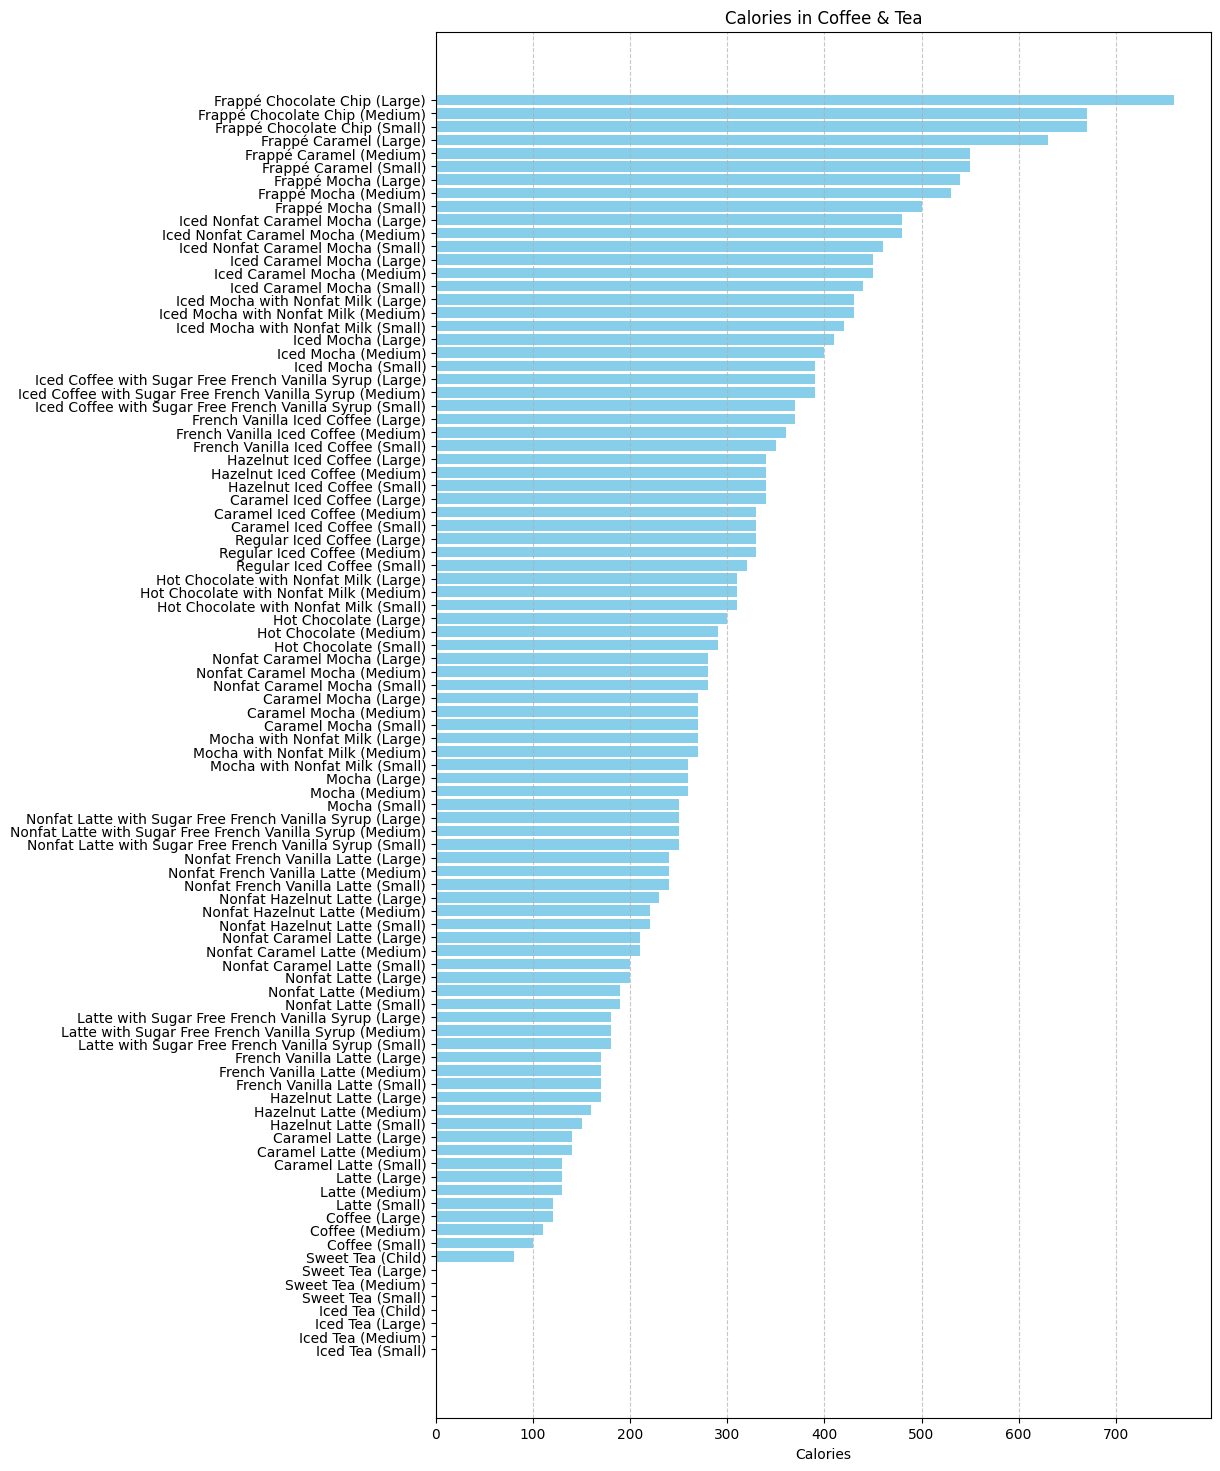

In [15]:
# Coffee & Tea
# Filtering the data for the "Beverages" category
coffee_and_tea_data = menu_df[menu_df['Category'] == 'Coffee & Tea']

# Sorting the items based on calories in ascending order
coffee_and_tea_data_sorted = coffee_and_tea_data.sort_values('Calories')

# Plotting
plt.figure(figsize=(10, 18))
plt.barh(coffee_and_tea_data['Item'], coffee_and_tea_data_sorted['Calories'], color='skyblue')
plt.xlabel('Calories')
plt.title('Calories in Coffee & Tea')
plt.grid(axis='x', linestyle='--', alpha=0.7)

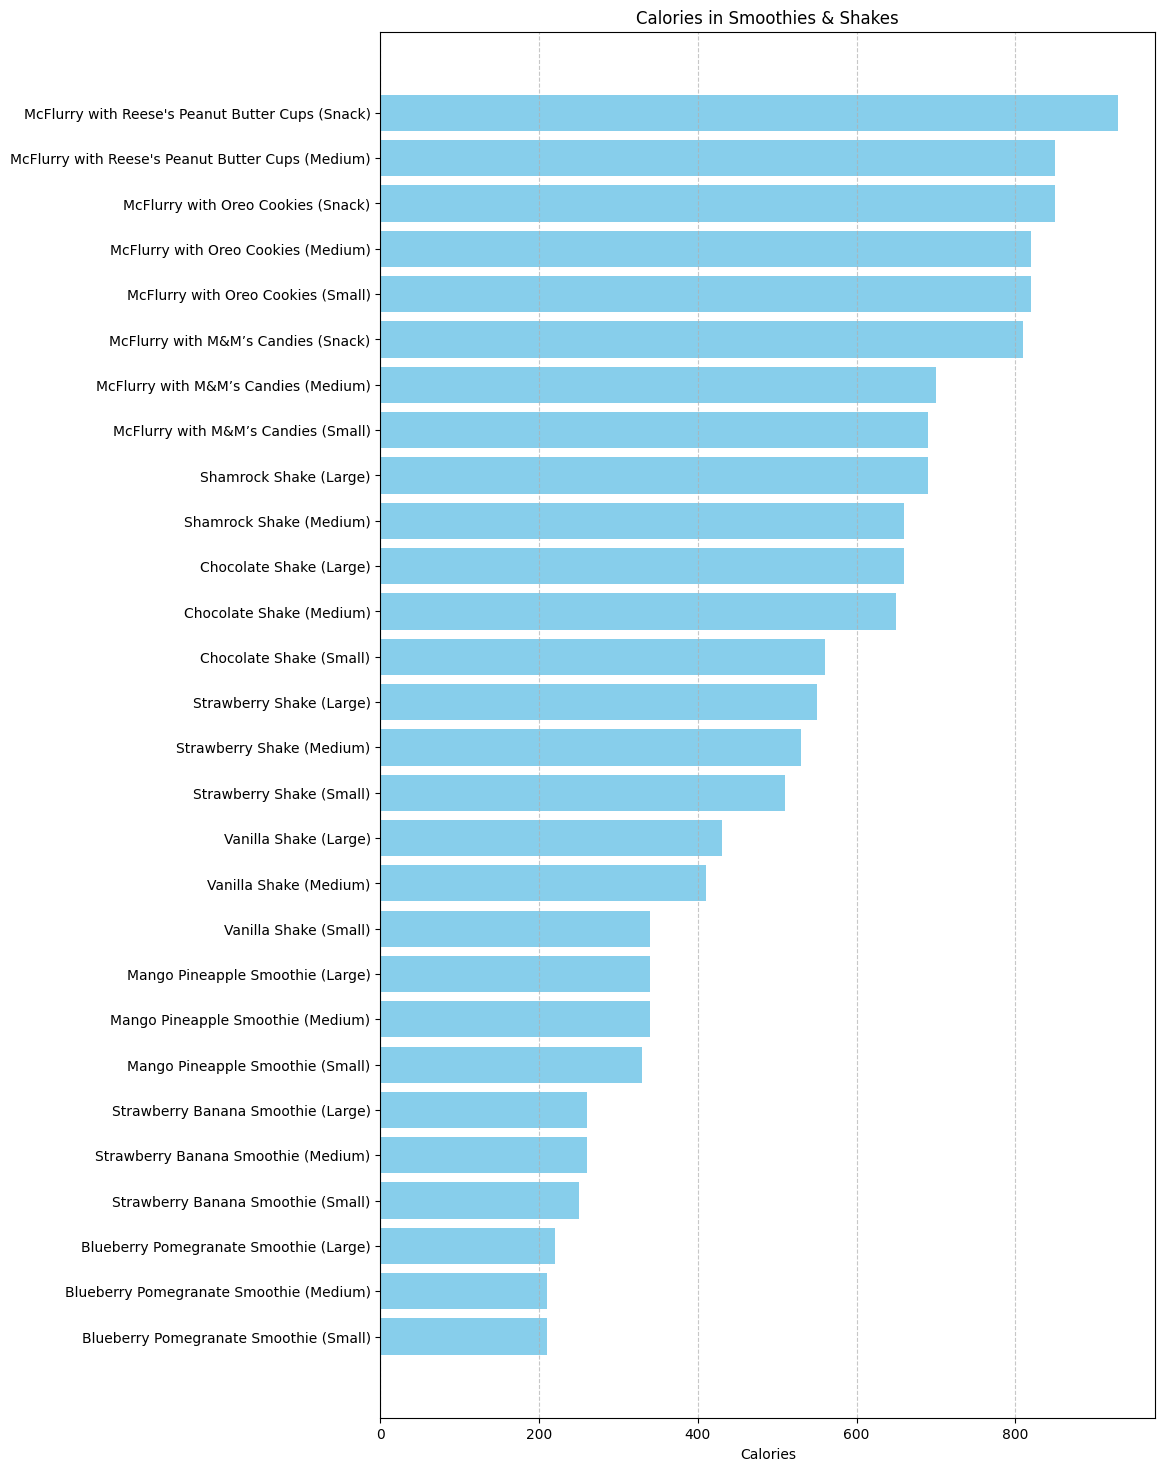

In [16]:
# Smoothies & Shakes
# Filtering the data for the "Smoothies & Shakes" category
smoothies_and_shakes_data = menu_df[menu_df['Category'] == 'Smoothies & Shakes']

# Sorting the items based on calories in ascending order
smoothies_and_shakes_data_sorted = smoothies_and_shakes_data.sort_values('Calories')

# Plotting
plt.figure(figsize=(10, 18))
plt.barh(smoothies_and_shakes_data['Item'], smoothies_and_shakes_data_sorted['Calories'], color='skyblue')
plt.xlabel('Calories')
plt.title('Calories in Smoothies & Shakes')
plt.grid(axis='x', linestyle='--', alpha=0.7)